# A reconstruction nosie dependence on CMB white noise level
This code compute normalization and power spectrum of quadratic estiamtors with varying CMB noise level

In [1]:
# external
import numpy as np
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import cmb

First define parameters

In [2]:
Tcmb  = 2.726e6    # CMB temperature
Lmin, Lmax  = 2, 2048       # maximum multipole of output normalization
rlmin, rlmax = 2, 2048  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)
ac2rad = np.pi/10800.
lTmax = rlmax
quad = ['TT','TE','EE','TB','EB','MV']
QDO = [True,True,True,True,True,False] # this means that TT, TE, EE, TB and EB are used for MV estimator

Load arrays of CMB unlensed and lensed Cls. Unlensed Cls are not used for now. The Cls should not be multiplied by any factors and should not have units.  

In [3]:
# ucl is an array of shape [0:5,0:rlmax+1] and ucl[0,:] = TT, ucl[1,:] = EE, ucl[2,:] = TE, lcl[3,:] = phiphi, lcl[4,:] = Tphi
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:rlmax+1] # TT, EE, TE, pp, Tp
# lcl is an array of shape [0:4,0:rlmax+1] and lcl[0,:] = TT, lcl[1,:] = EE, lcl[2,:] = BB, and lcl[3,:] = TE
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:rlmax+1] # TT, EE, BB, TE

Loop over SNR calculation

In [4]:
thetas = [30.,7.]
sigmas = [3.,70.]
Ag = {}
Ac = {}
for i, (sig, theta) in enumerate(zip(sigmas,thetas)):
    nl  = np.zeros((4,rlmax+1))
    nl[0,:] = .5*(sig*ac2rad/Tcmb)**2*np.exp(L*(L+1.)*(theta*ac2rad)**2/np.log(2.)/8.)
    nl[1,:] = 2.*nl[0,:]
    nl[2,:] = 2.*nl[0,:]
    nl[0,lTmax+1:] = 1e30
    ocl = lcl + nl
    Ag[i], Ac[i], Wg, Wc = cs.norm_quad.qall('lens',QDO,Lmax,rlmin,rlmax,lcl,ocl,lfac='k')
    #for qi in range(6):
    #    var_lm = ( ucl[3,Lmin:Lmax+1] + Ag[qi,Lmin:Lmax+1] ) 
    #    snr[qi,i] = np.sqrt( np.sum( (L[Lmin:Lmax+1]+.5) * ucl[3,Lmin:Lmax+1]**2/var_lm**2 ) )
    #print(snr[:,i])

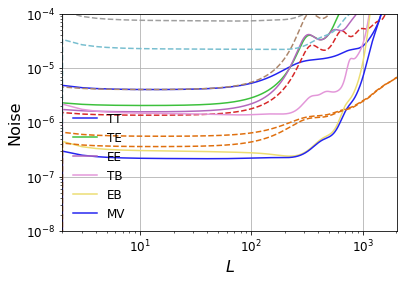

In [5]:
pl.plot_1dstyle(xmin=2,xmax=Lmax,ymin=1e-8,ymax=1e-4,xlab=r'$L$',ylab='Noise',xlog=True,ylog=True,grid=True)
for qi, q in enumerate(quad):
    plot(L,Ag[0][qi,:],ls='-',label=q)
    plot(L,Ag[1][qi,:],ls='--')
legend()